In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [75]:
data = pd.read_csv('./data/RTADataset.csv')

In [76]:
data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


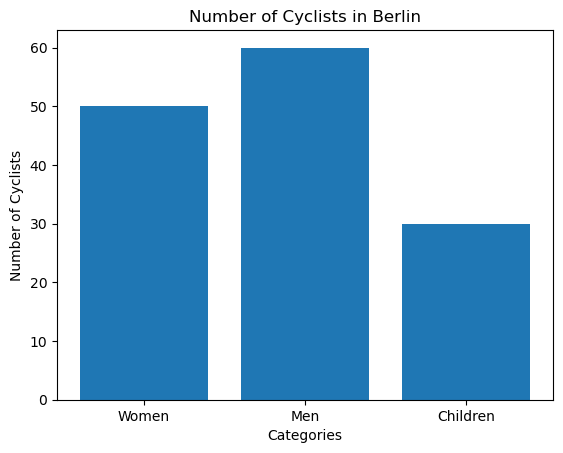

In [77]:
categories= ['Women','Men','Children']
counts= [50,60,30]
plt.bar(categories,counts)
plt.xlabel('Categories')
plt.ylabel('Number of Cyclists')
plt.title('Number of Cyclists in Berlin')

plt.show()

In [78]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

<Axes: >

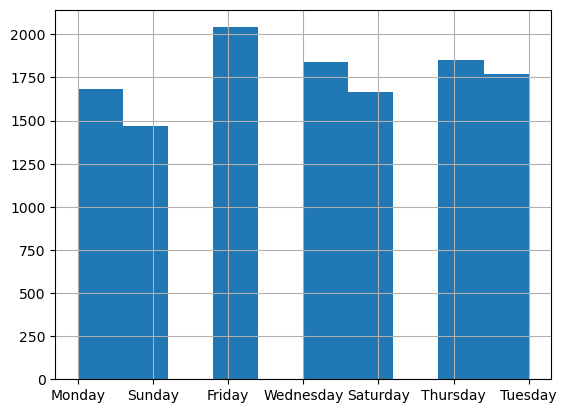

In [79]:
data['Day_of_week'].hist()

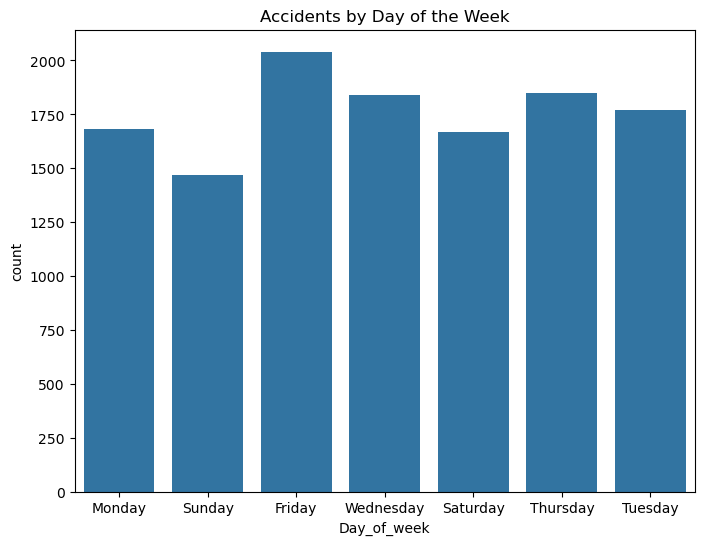

In [80]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Day_of_week')
plt.title('Accidents by Day of the Week')
plt.show()

In [88]:
data.groupby('Day_of_week').size().reset_index(name='Count')

,Day_of_week,Count
0,Friday,2041
1,Monday,1681
2,Saturday,1666
3,Sunday,1467
4,Thursday,1851
5,Tuesday,1770
6,Wednesday,1840


In [90]:
data.groupby('Time').size().reset_index(name='Count')

,Time,Count
0,0:01:00,9
1,0:02:00,2
2,0:03:00,2
3,0:04:00,1
4,0:06:00,2
...,...,...
1069,9:55:00,20
1070,9:56:00,2
1071,9:57:00,12
1072,9:58:00,1


In [92]:
data.groupby('Educational_level').size().reset_index(name='count')

,Educational_level,count
0,Above high school,362
1,Elementary school,2163
2,High school,1110
3,Illiterate,45
4,Junior high school,7619
5,Unknown,100
6,Writing & reading,176


In [55]:
def getAccidentSeverity():
    accidentSeverity =data.groupby('Accident_severity').size().to_dict() 
    return json.dumps(accidentSeverity,indent=4)

In [72]:
accidentSeverity =data.groupby(['Number_of_vehicles_involved', 'Accident_severity']).size().reset_index(name='Count').to_json(orient='records')
accidentSeverity

'[{"Number_of_vehicles_involved":1,"Accident_severity":"Fatal injury","Count":43},{"Number_of_vehicles_involved":1,"Accident_severity":"Serious Injury","Count":519},{"Number_of_vehicles_involved":1,"Accident_severity":"Slight Injury","Count":1434},{"Number_of_vehicles_involved":2,"Accident_severity":"Fatal injury","Count":104},{"Number_of_vehicles_involved":2,"Accident_severity":"Serious Injury","Count":963},{"Number_of_vehicles_involved":2,"Accident_severity":"Slight Injury","Count":7273},{"Number_of_vehicles_involved":3,"Accident_severity":"Fatal injury","Count":11},{"Number_of_vehicles_involved":3,"Accident_severity":"Serious Injury","Count":210},{"Number_of_vehicles_involved":3,"Accident_severity":"Slight Injury","Count":1347},{"Number_of_vehicles_involved":4,"Accident_severity":"Serious Injury","Count":39},{"Number_of_vehicles_involved":4,"Accident_severity":"Slight Injury","Count":324},{"Number_of_vehicles_involved":6,"Accident_severity":"Serious Injury","Count":12},{"Number_of_v

In [49]:
print(getAccidentSeverity())

{
    "Fatal injury": 158,
    "Serious Injury": 1743,
    "Slight Injury": 10415
}


In [54]:
data['Age_band_of_driver'].value_counts().sort_index()

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Under 18     825
Unknown     1548
Name: count, dtype: int64